# Stable Video Diffusion

In [ ]:
!nvidia-smi -L

In [1]:
!pip3 install torch torchvision torchaudio diffusers transformers accelerate

In [2]:
!pip install transformers

In [3]:
import torch

In [4]:

!pip install opencv-python-headless

In [5]:
!pip install accelerate

In [6]:
import torch
import diffusers
import transformers

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [7]:
torch.__version__

'2.5.1+cu121'

In [8]:
diffusers.__version__

'0.31.0'

In [9]:
transformers.__version__

'4.46.3'

In [10]:
import cv2

In [11]:
cv2.__version__

'4.10.0'

In [12]:
from diffusers import StableVideoDiffusionPipeline

In [13]:
pipe = StableVideoDiffusionPipeline.from_pretrained('stabilityai/stable-video-diffusion-img2vid-xt',
                                                   torch_dtype=torch.float16,
                                                   variant='fp16')
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/984 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [14]:
from diffusers.utils import load_image, export_to_video

In [16]:
image = load_image("soft_hug.png")

In [17]:
image.size

(1130, 1458)

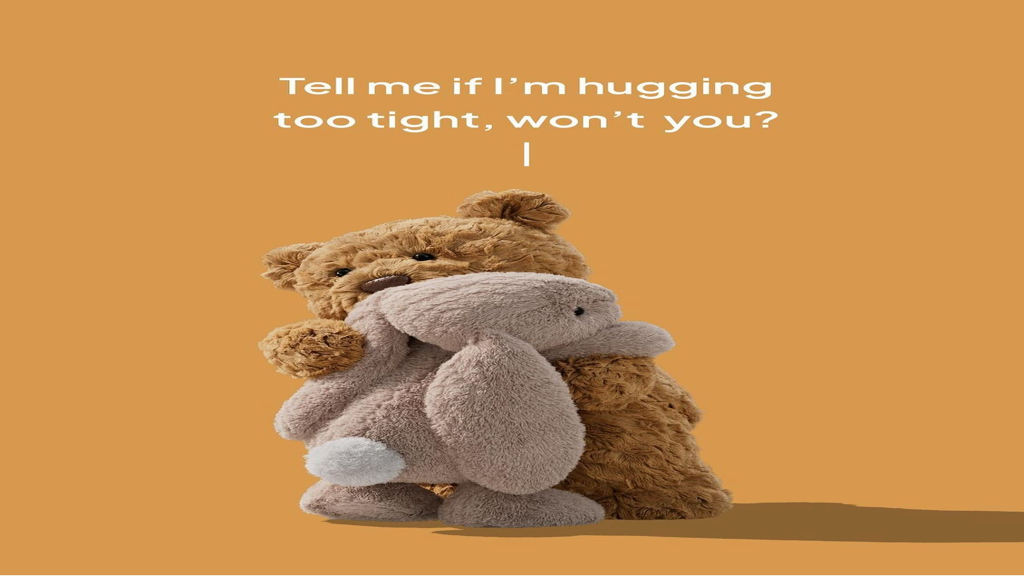

In [19]:
image.resize((1024,576))

In [20]:
generator = torch.manual_seed(42)

In [21]:
frames = pipe(image,decode_chunk_size=8,generator=generator).frames[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [22]:
export_to_video(frames,'generated.mp4',fps=7)

'generated.mp4'

In [23]:
type(frames)

list

In [24]:
type(frames[0])

PIL.Image.Image

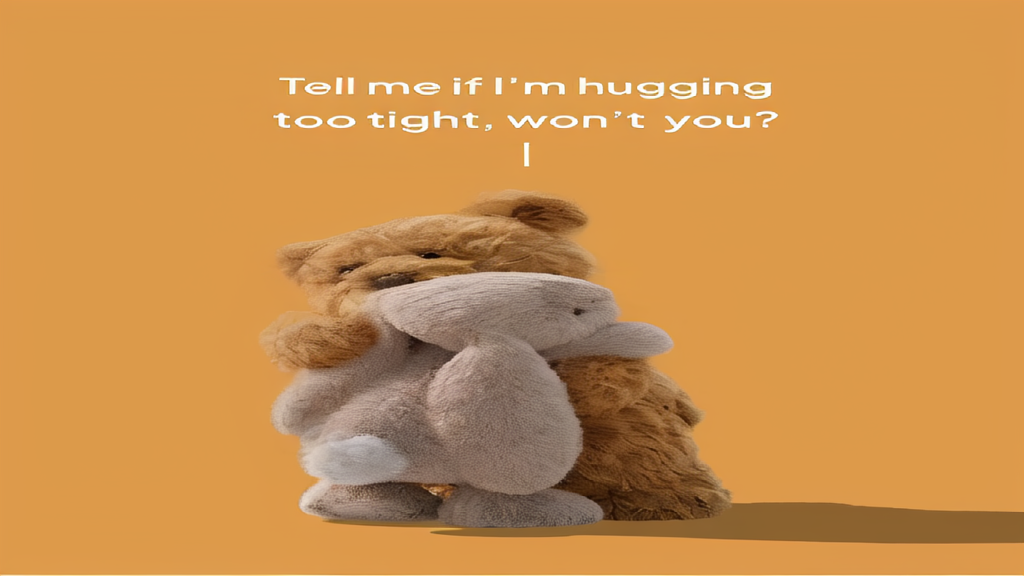

In [25]:
frames[1]